In [1]:
# Project 02

In [2]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
# read data
data_train = pd.read_csv('merged_train.csv')
data_test = pd.read_csv('demographics_test.csv')

In [4]:
data_train.head()

,County,State,2014 Population,2010 Population,Population Percent Change,Percent Under 5 Years,Percent Under 18 Years,Percent 65 and Older,Percent Female,Percent White,...,Ted Cruz.Percent of Votes,No Preference.Number of Votes,No Preference.Party,No Preference.Percent of Votes,Uncommitted.Number of Votes,Uncommitted.Party,Uncommitted.Percent of Votes,Democratic,Republican,Party
0,Clinton,IN,32776,33224,-1.3,6.9,26.3,15.8,50.5,97.8,...,39.9,0,NaN,0.0,0,NaN,0.0,1770,6363,0
1,Cass,NE,25524,25241,1.1,6.0,24.6,16.1,49.6,97.0,...,22.5,0,NaN,0.0,0,NaN,0.0,283,2767,0
2,Walton,GA,87615,83768,4.6,6.2,25.9,14.2,51.3,79.6,...,30.9,0,NaN,0.0,0,NaN,0.0,3278,18818,0
3,Norfolk,MA,692254,670850,3.2,5.4,21.6,15.7,52.1,80.9,...,8.8,6,NaN,0.3,0,NaN,0.0,1716,1686,1
4,Beaver,PA,169392,170539,-0.7,5.1,19.7,19.7,51.6,91.1,...,22.3,0,NaN,0.0,0,NaN,0.0,22526,19081,1


In [5]:
# TASK 01: Partition the data
# partition dataset into training, validation, and test sets using holdout method
# Predictor Variables: Race, Ethnicity
# Response Variable: number of votes cast for candidates from the Democratic party in each county
X_train, X_test, Y_train, Y_test = train_test_split(data_train[[
                                                            'Percent Foreign Born', \
                                                            'Percent Language Other than English at Home', \
                                                            'Population per Square Mile', \
                                                            'Percent Black or African American', \
                                                            'Percent 65 and Older', \
                                                            'Percent Below Poverty Level', \
                                                            '2014 Population']], \
                                                data_train['Party'], test_size = 0.25, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 0)

In [6]:
white = data_train['Percent White']
black = data_train['Percent Black or African American']
sixtyFivePlus = data_train['Percent 65 and Older']
poverty = data_train['Percent Below Poverty Level']
population2014 = data_train['2014 Population']

In [7]:
# TASK 02: Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [8]:
# TASK 03: Simple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ black', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     23.08
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.67e-06
Time:                        21:55:54   Log-Likelihood:                -24994.
No. Observations:                2115   AIC:                         4.999e+04
Df Residuals:                    2113   BIC:                         5.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6557.3986    855.175      7.668      0.0

In [9]:
# TASK 03: Simple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ white', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     67.56
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           3.52e-16
Time:                        21:55:54   Log-Likelihood:                -24972.
No. Observations:                2115   AIC:                         4.995e+04
Df Residuals:                    2113   BIC:                         4.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.974e+04   3827.106     10.383      0.0

In [10]:
# TASK 03: Simple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ sixtyFivePlus', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     76.61
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           4.17e-18
Time:                        21:55:55   Log-Likelihood:                -24968.
No. Observations:                2115   AIC:                         4.994e+04
Df Residuals:                    2113   BIC:                         4.995e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.386e+04   2946.920     11.491

In [11]:
# TASK 03: Simple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ poverty', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.833
Date:                Wed, 28 Nov 2018   Prob (F-statistic):            0.00901
Time:                        21:55:55   Log-Likelihood:                -25002.
No. Observations:                2115   AIC:                         5.001e+04
Df Residuals:                    2113   BIC:                         5.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.371e+04   2002.238      6.846      0.0

In [12]:
# TASK 03: Simple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ population2014', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:55:55   Log-Likelihood:                -23061.
No. Observations:                2115   AIC:                         4.613e+04
Df Residuals:                    2113   BIC:                         4.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -424.4931    299.303     -1.

In [13]:
# train and test simple linear regression model (Democratic votes)
r_squared = results.rsquared
print(r_squared)

0.8409404188759462


In [14]:
# TASK 04: Multiple Linear Regression - Democratic
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Democratic ~ white + black + sixtyFivePlus + poverty + population2014', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2271.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:55:55   Log-Likelihood:                -23045.
No. Observations:                2115   AIC:                         4.610e+04
Df Residuals:                    2109   BIC:                         4.614e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        946.5208   4039.980      0.

In [15]:
# train and test multiple linear regression model (Democratic votes)
r_squared = results.rsquared
adjusted_r_squared = results.rsquared_adj
print([r_squared, adjusted_r_squared])

[0.8433391667878679, 0.8429677565621397]


In [16]:
# TASK 05: Simple Linear Regression - Republican
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Republican ~ black', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.12
Date:                Wed, 28 Nov 2018   Prob (F-statistic):            0.00149
Time:                        21:55:55   Log-Likelihood:                -24059.
No. Observations:                2115   AIC:                         4.812e+04
Df Residuals:                    2113   BIC:                         4.813e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8757.7532    549.519     15.937      0.0

In [17]:
# TASK 05: Simple Linear Regression - Republican
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Republican ~ white', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     28.25
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.18e-07
Time:                        21:55:55   Log-Likelihood:                -24050.
No. Observations:                2115   AIC:                         4.810e+04
Df Residuals:                    2113   BIC:                         4.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.264e+04   2474.158      9.152      0.0

In [18]:
# TASK 05: Simple Linear Regression - Republican
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Republican ~ sixtyFivePlus', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.46e-25
Time:                        21:55:55   Log-Likelihood:                -24009.
No. Observations:                2115   AIC:                         4.802e+04
Df Residuals:                    2113   BIC:                         4.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.897e+04   1872.761     15.471

In [19]:
# TASK 05: Simple Linear Regression - Republican
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Republican ~ poverty', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     48.04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           5.51e-12
Time:                        21:55:56   Log-Likelihood:                -24040.
No. Observations:                2115   AIC:                         4.808e+04
Df Residuals:                    2113   BIC:                         4.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.794e+04   1270.402     14.124      0.0

In [20]:
# TASK 05: Simple Linear Regression - Republican
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'Republican ~ population2014', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3469.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:55:56   Log-Likelihood:                -23036.
No. Observations:                2115   AIC:                         4.608e+04
Df Residuals:                    2113   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4629.3881    295.790     15.

In [21]:
# train and test simple linear regression model (Republican votes)
r_squared = results.rsquared
print(r_squared)

0.6214783099891945


In [22]:
# TASK 06: Multiple Linear Regression - Republican
model = smf.ols(formula = 'Republican ~ white + black + sixtyFivePlus + poverty + population2014', data = data_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     743.3
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:55:56   Log-Likelihood:                -22989.
No. Observations:                2115   AIC:                         4.599e+04
Df Residuals:                    2109   BIC:                         4.602e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7892.2922   3934.324      2.

In [23]:
# train and test multiple linear regression model (Republican votes)
r_squared = results.rsquared
adjusted_r_squared = results.rsquared_adj
print([r_squared, adjusted_r_squared])

[0.6379828528594493, 0.6371245855594481]


In [24]:
# TASK 07: Build a classification model to classify each county as Democratic or Republican
scalar = StandardScaler()
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
# predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(X_test) 

In [26]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[333  48]
 [108  40]]


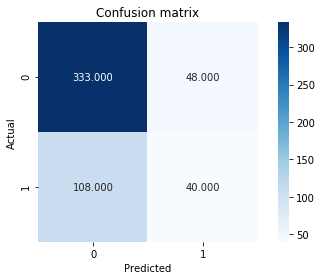

In [27]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [28]:
# compute evaluation metrics
print(metrics.accuracy_score(Y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(Y_test, y_pred)) # error
print(metrics.precision_score(Y_test, y_pred, average = None)) # precision
print(metrics.recall_score(Y_test, y_pred, average = None)) # recall
print(metrics.f1_score(Y_test, y_pred, average = None)) # F1 score

0.7051039697542533
0.29489603024574673
[0.75510204 0.45454545]
[0.87401575 0.27027027]
[0.81021898 0.33898305]


In [29]:
# CLASSIFIER: Logistic Regression
# initialize logistic regression classifier
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# predict class labels using logistic regression classifier
y_pred = classifier.predict(X_test)

In [31]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[369  12]
 [119  29]]


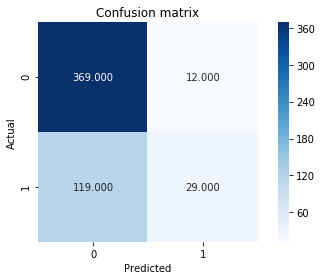

In [32]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [33]:
# train and test classification model
accuracy = metrics.accuracy_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test, y_pred, average = None)
recall = metrics.recall_score(Y_test, y_pred, average = None)
F1_score = metrics.f1_score(Y_test, y_pred, average = None)
print([accuracy, precision, recall, F1_score])

[0.7523629489603024, array([0.75614754, 0.70731707]), array([0.96850394, 0.19594595]), array([0.84925201, 0.30687831])]


In [34]:
# train and test clustering model
adjusted_rand_index =
silhouette_coefficient =

SyntaxError: invalid syntax (<ipython-input-34-27e2e4fa28bf>, line 2)